In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from bs4 import BeautifulSoup
import urllib.request
import re
import time
import pandas as pd

In [3]:
# Test to see the html page of leboncoin

leboncoin = "https://www.leboncoin.fr/locations/offres/ile_de_france/paris/?ret=2&f=p"
with urllib.request.urlopen(leboncoin) as url:
    s = url.read()
#I'm guessing this would output the html source code?
soup = BeautifulSoup(s)
print(soup)

<!DOCTYPE html>
<html class="no-js">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="#F56B2A" name="theme-color"/>
<meta content="#F56B2A" name="msapplication-navbutton-color"/>
<meta content="#F56B2A" name="apple-mobile-web-app-status-bar-style"/>
<!--
            / \    We're hiring. Now.
           /   \
          /     \  Want to code using Go, Python, C, SQL, PHP, JS, Java,
         |\     /| and play with Casssandra, Kafka, Thrift or Redis?
         | \   / | If you enjoy tackling unique and challenging scalability
         |  \ /  | problems, just know we have many IT positions available.
         |   |   | Wether you are just out of school or a seasoned tech
          \  |  /  veteran, just take a look at our current job offers:
           \ | /
            \ /    h

C:\Users\Peter martigny\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


# Get data from front page

In [4]:
# Function that give the superficial info from a page with a list of offers

def get_front(url):
    with urllib.request.urlopen(url) as url:
        s = url.read()
    soup = BeautifulSoup(s)
    letters = soup.find_all("a", class_="list_item clearfix trackable")
    url_list = []
    id_list = []
    title_list = []
    price_list = []
    location_list = []
    release_list = []
    for i in range(0, 35):
        try:
            url_list.append('https://' + letters[i]['href'][2:])
        except Exception as e:
            url_list.append('')
        try:
            id_list.append(re.findall('[0-9]+', letters[i]["data-info"])[0])
        except Exception as e:
            id_list.append('')
        try:
            title_list.append(letters[i]['title'])
        except Exception as e:
            title_list.append('')
        try:
            price_list.append(float(re.findall('[0-9]+', letters[i].h3.get_text().replace(' ', ''))[0]))
        except Exception as e:
            price_list.append('') 
        try:
            release_list.append(letters[i].find_all('p', class_="item_supp")[2].get_text().lstrip().rstrip().replace('\t', '').replace('\n', ''))
        except Exception as e:
            release_list.append('')
    return [url_list, id_list, title_list, price_list, release_list]

# Get data from particular offer

In [5]:
# def get_offer_info(url):
# # Import offer page
#     with urllib.request.urlopen(url) as url:
#         s = url.read()
#     soup = BeautifulSoup(s)

#     # get description
#     description = soup.findAll('div', class_="line properties_description")[0].get_text().replace('\n', ' ').rstrip().lstrip()
#     ## get th rest
#     infos = soup.findAll('h2', class_="clearfix")
#     # get location
#     location = infos[1].get_text().rstrip().lstrip()[-11:]
#     #get number_rooms
#     number_rooms = re.findall('[0-9]+', infos[3].findAll('span')[1].get_text())[0]
#     # get furnished
#     furnished = ((infos[4]).findAll('span', class_='value')[0]).get_text()
#     # get superficy
#     superficy = infos[5].findAll('span')[1].get_text()
# #     # get GES
# #     GES = infos[6].a.get_text()
# #     # get energy class
# #     energy_class = infos[7].a.get_text()
    
#     return [description, location, number_rooms, furnished, superficy]

In [36]:
# def get_page_info(url):
#     front = get_front(url)
#     infos_offer = []
#     for i in front[0]:
#         try:
#             infos_offer.append(get_offer_info(i))
#         except Exception as e:
#             pass
#     return front, infos_offer

In [12]:
#a, b = get_page_info(leboncoin)

In [5]:
def get_page_info(url):
    front = get_front(url)
    description_list = []
    location_inside_list = []
    room_list = []
    furnished_list = []
    superficy_list = []
#     ges_list = []
#     energy_list = [] 
    for i in front[0]:
        try:
            with urllib.request.urlopen(i) as url:
                s = url.read()
            soup = BeautifulSoup(s)
            infos = soup.findAll('h2', class_="clearfix")
            try:
                description_list.append(soup.findAll('div', class_="line properties_description")[0].get_text().replace('\n', ' ').rstrip().lstrip())
            except Exception as e:
                description_list.append('')
            try:
                location_inside_list.append(infos[1].get_text().rstrip().lstrip()[-11:])
            except Exception as e:
                location_inside_list.append('')
            try:
                room_list.append(re.findall('[0-9]+', infos[3].findAll('span')[1].get_text())[0])
            except Exception as e:
                room_list.append('')
            try:
                furnished_list.append(((infos[4]).findAll('span', class_='value')[0]).get_text())
            except Exception as e:
                furnished_list.append('')
            try:
                superficy_list.append(infos[5].findAll('span')[1].get_text())
            except Exception as e:
                superficy_list.append('')
        except Exception as e:
            description_list.append('')
            location_inside_list.append('')
            room_list.append('')
            furnished_list.append('')
            superficy_list.append('')
                 
    a = pd.DataFrame(front).transpose()
    b = [description_list, location_inside_list, room_list, furnished_list, superficy_list]
    b = pd.DataFrame(b).transpose()[0:35]
    a.columns = ['url', 'id', 'title', 'price', 'release']
    b.columns = ['description', 'location_inside', 'rooms', 'furnished', 'superficy']
    result = pd.concat([a, b], axis=1)
    
    return result

In [6]:
start_time = time.time()
a = get_page_info(leboncoin)
print(time.time() - start_time)

C:\Users\Peter martigny\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


6.034260511398315


In [11]:
a.shape

(35, 10)

In [100]:
['https://www.leboncoin.fr/locations/offres/ile_de_france/paris/?o=%i&ret=2&f=p' %i for i in range(1, 10)][1:]

['https://www.leboncoin.fr/locations/offres/ile_de_france/paris/?o=2&ret=2&f=p',
 'https://www.leboncoin.fr/locations/offres/ile_de_france/paris/?o=3&ret=2&f=p',
 'https://www.leboncoin.fr/locations/offres/ile_de_france/paris/?o=4&ret=2&f=p',
 'https://www.leboncoin.fr/locations/offres/ile_de_france/paris/?o=5&ret=2&f=p',
 'https://www.leboncoin.fr/locations/offres/ile_de_france/paris/?o=6&ret=2&f=p',
 'https://www.leboncoin.fr/locations/offres/ile_de_france/paris/?o=7&ret=2&f=p',
 'https://www.leboncoin.fr/locations/offres/ile_de_france/paris/?o=8&ret=2&f=p',
 'https://www.leboncoin.fr/locations/offres/ile_de_france/paris/?o=9&ret=2&f=p']

# Scale to N pages

In [13]:
def get_n_pages(N):
    list_pages = ['https://www.leboncoin.fr/locations/offres/ile_de_france/paris/?o=%i&ret=2&f=p' %i for i in range(1, N+1)]
    a = get_page_info(list_pages[0])
    
    for i in list_pages[1:]:
        ind = list_pages[1:].index(i)
        b = get_page_info(i)
        frames = [a, b]
        a = pd.concat(frames).reset_index()
        a = a.drop('index', 1)
        print('Page %i has been scrapped' %ind)
        time.sleep(2)
    return a

In [17]:
start_time = time.time()
c = get_n_pages(100)
print(time.time() - start_time)

C:\Users\Peter martigny\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Page 0 has been scrapped
Page 1 has been scrapped
Page 2 has been scrapped
Page 3 has been scrapped
Page 4 has been scrapped
Page 5 has been scrapped
Page 6 has been scrapped
Page 7 has been scrapped
Page 8 has been scrapped
Page 9 has been scrapped
Page 10 has been scrapped
Page 11 has been scrapped
Page 12 has been scrapped
Page 13 has been scrapped
Page 14 has been scrapped
Page 15 has been scrapped
Page 16 has been scrapped
Page 17 has been scrapped
Page 18 has been scrapped
Page 19 has been scrapped
Page 20 has been scrapped
Page 21 has been scrapped
Page 22 has been scrapped
Page 23 has been scrapped
Page 24 has been scrapped
Page 25 has been scrapped
Page 26 has been scrapped
Page 27 has been scrapped
Page 28 has been scrapped
Page 29 has been scrapped
Page 30 has been scrapped
Page 31 has been scrapped
Page 32 has been scrapped
Page 33 has been scrapped
Page 34 has been scrapped
Page 35 has been scrapped
Page 36 has been scrapped
Page 37 has been scrapped
Page 38 has been scrap

In [31]:
c.shape, c[c.url != ''].shape

((3500, 10), (1817, 10))

In [38]:
c.to_csv('data_16_10_05.csv', sep = ';', encoding='utf-8')

In [42]:
d = pd.read_csv('data_16_10_05.csv', sep = ';')
d['title']

0             Studio duplex Marais 27m2, 25 rue du temple
1             Studio meublé - Paris 3ème, Arts et Métiers
2                                      Location F2 meublé
3                   Beau studio à RDC sur rue calme 20ème
4                      Grande chambre meublée dans le 17e
5                                     Studio 38 m2 meublé
6                         Chambre en plein coeur de paris
7           Loue Chambre meublée Paris 16 Chardon-Lagache
8       Beau deux pièces à Louer Paris 13ème, Limite 5ème
9       Location Saisonnière 2-Pièce avec Balcon Plein...
10                              Bel appartement Paris 15°
11                             APPARTEMENT T3 PARIS 15ème
12         Appartement 2 pièces meublé - Paris 13 Tolbiac
13               Paris 9e, studio de charme avec terrasse
14              Appartement Studio 75016/75008 Paris 20m2
15                                          F1 non meublé
16       Location meuble t4 la motte piquet grenelle 7501
17            

In [25]:
c[c.id == '1024616338'].description.tolist()

["Description : Merci de lire l'annonce jusqu'au bout.Jeune femme propose de partager un studio avec une jeune femme propre et discrète. Immeuble ancien poutres apparentes, très lumineux et surtout très calme.il dispose de tout le confort nécessaire, 2 grands couchages séparés, idéal pour une personne de passage à Paris pour stage, vacances ou autre, libre immédiatement  pour une durée de 5 à 6 mois le reste à définir. Je m'absente régulièrement, vous serez donc amener à disposer du studio seule pendant mes absences. merci de me préciser votre âge et situation et l'objet de votre venue à Paris dès le premier contact sinon aucune réponse ne sera donnée.Annonce pour femme uniquement aucune réponse pour les hommes"]

In [27]:
start_time = time.time()
data = get_n_pages(20)
print(time.time() - start_time)

C:\Users\Peter martigny\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Page 0 has been scrapped
Page 1 has been scrapped
Page 2 has been scrapped
Page 3 has been scrapped
Page 4 has been scrapped
Page 5 has been scrapped
Page 6 has been scrapped
Page 7 has been scrapped
Page 8 has been scrapped
Page 9 has been scrapped
Page 10 has been scrapped
Page 11 has been scrapped
Page 12 has been scrapped
Page 13 has been scrapped
Page 14 has been scrapped
Page 15 has been scrapped
Page 16 has been scrapped
Page 17 has been scrapped
Page 18 has been scrapped
Page 19 has been scrapped
Page 20 has been scrapped
Page 21 has been scrapped
Page 22 has been scrapped
Page 23 has been scrapped
Page 24 has been scrapped
Page 25 has been scrapped
Page 26 has been scrapped
Page 27 has been scrapped
Page 28 has been scrapped
Page 29 has been scrapped
Page 30 has been scrapped
Page 31 has been scrapped
Page 32 has been scrapped
Page 33 has been scrapped
Page 34 has been scrapped
Page 35 has been scrapped
Page 36 has been scrapped
Page 37 has been scrapped
Page 38 has been scrap

In [33]:
data[0:2000]

,url,id,title,price,release,description,location_inside,rooms,furnished,superficy
0,https://www.leboncoin.fr/locations/1024688459....,1024688459,Studette Paris,640,"Aujourd'hui, 22:07",Description : Studette meublee avenue de Clich...,Paris 75017,,12 m2,\nVierge\n
1,https://www.leboncoin.fr/locations/1024685663....,1024685663,Studio meublé Standing Champs Elysées,1310,"Aujourd'hui, 22:02","Description : Champs Elysées, immeuble standin...",Paris 75008,1,Meublé,27 m2
2,https://www.leboncoin.fr/locations/1024684139....,1024684139,: T2 40m2 -chauffage gaz compris,600,"Aujourd'hui, 21:59","Description : T2 avec placard/penderi,séjourch...",Paris 75006,2,Non meublé,40 m2
3,https://www.leboncoin.fr/locations/1024682692....,1024682692,Location meublée studio 9m2 Paris 17ème,440,"Aujourd'hui, 21:56",Description : Chambre de service meublée de 9m...,Paris 75017,1,Meublé,9 m2
4,https://www.leboncoin.fr/locations/1024682300....,1024682300,Magnifique deux pièces avec jardin -Montparnasse,1190,"Aujourd'hui, 21:55",Description : Deux-pièces à louer à 7 min à pi...,Paris 75014,2,Meublé,36 m2
5,https://www.leboncoin.fr/locations/1024680822....,1024680822,Loue chambre meublée proche St lazare,410,"Aujourd'hui, 21:52",Description : Loue chambre de service meublée ...,Paris 75008,1,Non meublé,9 m2
6,https://www.leboncoin.fr/locations/1024679404....,1024679404,Appartement 3 pieces rue Maubeuge,1720,"Aujourd'hui, 21:50",Description : Loue 3 pieces rue Maubeuge.Appar...,Paris 75009,3,Non meublé,69 m2
7,https://www.leboncoin.fr/locations/1024677955....,1024677955,Recherche appartement type F3/F4,980,"Aujourd'hui, 21:47",Description : Couple avec deux enfants En CDI ...,Paris 75016,3,50 m2,
8,https://www.leboncoin.fr/locations/1024677823....,1024677823,Appartement f3 15e,720,"Aujourd'hui, 21:47",Description : appartement refait a neuf type ...,Paris 75015,2,Meublé,69 m2
9,https://www.leboncoin.fr/locations/1024674486....,1024674486,Chambre a louer pour 3/4 mois,550,"Aujourd'hui, 21:41",Description : Dame loue pour 3/4 mois à femme ...,Paris 75018,1,Meublé,16 m2


In [31]:
data[data.url != ''].shape

(1849, 10)

# Save

In [203]:
data.to_csv('D:/Users/pmartign/Desktop/Leboncoin/new_data.csv', sep = ',')

In [208]:
df = pd.read_csv('D:/Users/pmartign/Desktop/Leboncoin/new_data.csv', encoding = "ISO-8859-1")

In [212]:
df = df.drop('Unnamed: 0', 1)

In [214]:
df.shape

(3710, 10)

# Process data

In [137]:
df = c

In [138]:
df.shape

(1750, 10)

In [139]:
df = df.dropna(subset = ['price', 'superficy'])

In [140]:
df = df.dropna()

In [141]:
df.shape

(1750, 10)

In [142]:
df.location_inside[df.location_inside == 'Paris 75116'] = 'Paris 75016'

In [143]:
df.location_inside.value_counts()

Paris 75018    201
Paris 75016    181
Paris 75017    176
Paris 75015    169
Paris 75011    116
Paris 75019    111
Paris 75010     93
Paris 75020     91
Paris 75012     88
Paris 75013     85
Paris 75014     77
Paris 75007     49
Paris 75009     49
Paris 75008     48
Paris 75006     47
Paris 75005     47
Paris 75003     37
Paris 75002     33
Paris 75004     27
Paris 75001     19
Appartement      6
Name: location_inside, dtype: int64

In [48]:
df.rooms.value_counts()

       5245
1       907
2       607
3       161
4        36
5        15
6         6
20        4
7         2
10        2
24        2
15        2
46        1
17        1
9         1
113       1
50        1
16        1
12        1
30        1
18        1
19        1
21        1
Name: rooms, dtype: int64

In [240]:
(df.description[df.rooms == 10.0])[1248]

"Description : Loue chambres meublées en colocation. (Jeunes pro)Dans la chambre :- 1 commode- 1 lit simple- 1 étagère- 1 salle d'eau : douche / lavabo / WCDans les parties communes :- 1 Salle de sport- 1 bibliothèque- 1 jardin"

In [241]:
df.head(3)

,url,id,title,price,release,description,location_inside,rooms,furnished,superficy
0,https://www.leboncoin.fr/locations/990067637.h...,990067637,Studio 15m² tout inclus Motte Picquet Grenelle...,850.0,"Aujourd'hui, 11:42",Description : PARIS 15e Métro Motte Picquet Gr...,Paris 75015,1.0,Meublé,15 m2
1,https://www.leboncoin.fr/locations/990066666.h...,990066666,"Studio charmant Montmartre, 15/7-30/8",650.0,"Aujourd'hui, 11:40",Description : Je cherche une sous-locataire (n...,Paris 75018,1.0,Meublé,13 m2
2,https://www.leboncoin.fr/locations/990066503.h...,990066503,Paris 2 Location studio meublé tout équipé,570.0,"Aujourd'hui, 11:40","Description : 2ème ARRONDISSEMENT, rue dAbouk...",Paris 75002,1.0,Meublé,10 m2


In [252]:
df.description = df.description.apply(lambda x: x.split())

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [256]:
df['length'] = 1

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [261]:
(df.description[0])

109

In [264]:
df['description_length'] = df.apply(lambda row: len(row['description']), axis=1)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [267]:
df = df.reset_index()

In [ ]:
##### import matplotlib.pyplot
import pylab

x = df.description_length[df.description_length < 150][df.price < 2000]
y = df.price[df.description_length < 150][df.price < 2000]

matplotlib.pyplot.scatter(x,y)

matplotlib.pyplot.show()

In [289]:
re.findall('[0-9]+', df.superficy[0])[0]

'15'

In [293]:
df.superficy[0][:-3]

'15'

In [144]:
df.superficy = df.superficy.apply(lambda x: x[:-3])

In [ ]:
s.convert_objects(convert_numeric=True)

In [145]:
df.superficy = df.superficy.convert_objects(convert_numeric=True)

C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [146]:
df.superficy.mean()

33.469284357188094

In [147]:
df['per_sm_price'] = df.apply(lambda row: 0)

In [148]:
for i in range(0, len(df)):
    try:
        df.per_sm_price[i] = df.price[i]/df.superficy[i]
    except Exception as e:
        pass

C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [149]:
df = df.dropna(subset = ['per_sm_price'])

In [150]:
df.shape

(1579, 11)

In [151]:
df.head(2)

,url,id,title,price,release,description,location_inside,rooms,furnished,superficy,per_sm_price
1,https://www.leboncoin.fr/locations/1024714721....,1024714721,"Location chambre dans 3P meublé, porte maillot",680,"Hier, 23:15",Description : sous-location courant octobre d'...,Paris 75017,3,Meublé,44.0,15.454545
2,https://www.leboncoin.fr/locations/1024714536....,1024714536,Chambre meublée Paris 7ème proche rue de Sèvres,490,"Hier, 23:15",Description : Chambre meublée proche du métro ...,Paris 75007,1,Meublé,11.0,44.545455


In [325]:
df.title = df.title.apply(lambda x: x.split())

In [326]:
df['title_length'] = df.apply(lambda row: len(row['title']), axis=1)

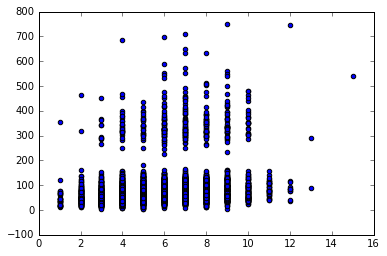

In [329]:
x = df.title_length
y = df.description_length

matplotlib.pyplot.scatter(x,y)

matplotlib.pyplot.show()

In [333]:
df.head(2)

,url,id,title,price,release,description,location_inside,rooms,furnished,superficy,description_length,per_sm_price,title_length
0,https://www.leboncoin.fr/locations/990067637.h...,990067637,"[Studio, 15m², tout, inclus, Motte, Picquet, G...",850.0,"Aujourd'hui, 11:42","[Description, :, PARIS, 15e, Métro, Motte, Pic...",Paris 75015,1.0,Meublé,15.0,109,56.666667,8
1,https://www.leboncoin.fr/locations/990066666.h...,990066666,"[Studio, charmant, Montmartre,, 15/7-30/8]",650.0,"Aujourd'hui, 11:40","[Description, :, Je, cherche, une, sous-locata...",Paris 75018,1.0,Meublé,13.0,70,50.000000,4


In [332]:
df = df.drop(['length'], 1)

In [334]:
df.furnished.value_counts()

Meublé        2737
Non meublé     649
Name: furnished, dtype: int64

In [335]:
df.to_csv('D:/Users/pmartign/Desktop/Leboncoin/data_ready.csv')

# Import open data sources

In [58]:
df = pd.read_csv('encadrement_loyers_paris.csv')
dg = pd.read_csv('QUARTIER.csv')

data=pd.merge(df,dg, left_on='idQuartier', right_on='C_QU')

In [103]:
def arrondissement(x):
    return str(x)[-2:]
data['arrondissement'] = data['N_SQ_AR'].apply(lambda x: arrondissement(x))
loyer_arrondissement = []
for i in data.arrondissement.unique().tolist():
    loyer_max_max = data[data.arrondissement == i].refmaj.max()
    loyer_max_mean = data[data.arrondissement == i].refmaj.mean()
    loyer_max_median = data[data.arrondissement == i].refmaj.median()
    loyer_arrondissement.append([i, loyer_max_max, loyer_max_mean, loyer_max_median])

In [104]:
arrondissements = pd.DataFrame(loyer_arrondissement, columns = ['arrondissement', 'max_max', 'max_mean', 'max_median'])

In [152]:
df['arrondissement'] = df['location_inside'].apply(lambda x: arrondissement(x))

In [153]:
data1=pd.merge(df,arrondissements, on = 'arrondissement')

In [154]:
data1.shape

(1579, 15)

In [155]:
data1[data1['per_sm_price'] > data1['max_max']].superficy.median()

17.0

In [156]:
data1.superficy.median()

30.0

In [162]:
len(data1[data1['per_sm_price'] > data1['max_max']]) / len(data1)

0.34452184927169094

In [161]:
len(data1[data1['per_sm_price'] > data1['max_mean']]) / len(data1)

0.7941735275490817

In [165]:
len(data1[data1['per_sm_price'] > data1['max_median']]) / len(data1)

0.8036732108929703

In [119]:
data1[data1['per_sm_price'] > data1['max_max']].arrondissement.value_counts()

15    16
17    14
16    12
11     9
10     8
18     7
08     6
09     4
20     4
05     4
14     4
12     3
06     3
02     3
19     2
03     1
13     1
Name: arrondissement, dtype: int64

In [163]:
pourcentage = []
for i in data1.arrondissement.unique().tolist():
    total = len(data1[data1.arrondissement == i])
    subtotal = len(data1[data1['per_sm_price'] > data1['max_max']][data1.arrondissement == i])
    pourcentage.append([i, subtotal/total])

C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [164]:
pd.DataFrame(pourcentage, columns = ['arrondissement', 'pourcentage']).sort('pourcentage', ascending = False)

C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,arrondissement,pourcentage
6,08,0.523810
14,05,0.523810
5,02,0.500000
0,17,0.493750
17,10,0.488636
11,16,0.450617
4,03,0.448276
18,06,0.377778
13,11,0.349515
7,15,0.317568
